# G:  Fashion

Zalando - the online fashion retailer - has created a dataset. It is available on Kaggle but, like MNIST, Keras keeps a copy. It is deliberately similar to MNIST (which is why the dataset is called Fashion-MNIST). It comprises 70,000 grayscale images, each one $28 \times 28$ pixels in size. 60,000 are training examples and 10,000 are test examples. Each is labelled with one of 10 classes, already Label Encoded 0-9, where the labels represent the following: 0 T-shirt/top, 1 Trouser, 2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot.

In this lab, I want you to get used to coding up neural networks. Build some models using Keras; and try some model selection using keras-tuner.

There are neither hints nor answers in this lab sheet. 

In [62]:
# Here is a selection of import statements.
# You might not use all of them; and you might decide to include extra ones.

import matplotlib.pyplot as plt

from keras import Model
from keras import Input
from keras.layers import Dense
from keras.layers import Rescaling
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout

from keras.optimizers import RMSprop
from keras.optimizers import Adam

from keras.callbacks import EarlyStopping

from keras.regularizers import l2

from keras.datasets import fashion_mnist

In [3]:
# If you are running on Google Colab, uncomment the next line before executing this code cell.

# ! pip install keras_tuner

import keras_tuner

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

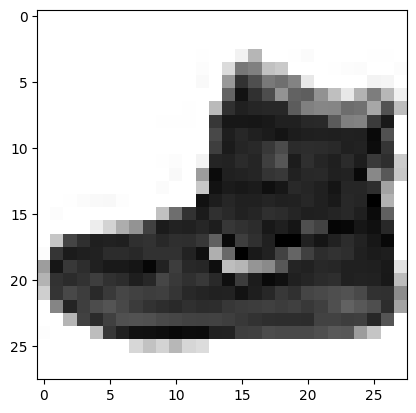

In [5]:
plt.imshow(X_train[0], cmap=plt.cm.binary, interpolation="nearest")

## Dense Network

We'll start with a dense network: one with *no* convolutional layers.

- Reshape the images so that each becomes one-dimensonal.
- Then define a dense neural network: input layer; rescaling; one dense hidden layer with 512 units using ReLU; and a dense output layer using the appropriate activation function.
- Compile it: use RMSprop as the optimizer with a learning rate of 0.01; choose the appropriate loss function; use accuracy as the metric.
- Fit it: use 0.25 validation split; 10 epochs; batch size of 32.
- Look at the training accuracy and validation accuracy: do you think you are underfitting? overfitting?

In [11]:
train_acc, val_acc = history.history["accuracy"][-1], history.history["val_accuracy"][-1]
train_acc, val_acc

(0.8614888787269592, 0.836733341217041)

Now, let's practice with `keras-tuner` hyperparameters.

Define a function that builds and compiles the model. Use `keras-tuner` hyperparameters so
- the network may have one dense hidden layer, or two or three
- the number of neurons in each of these layers may be 4 or 8 or 16
- the optimizer may be RMsprop or Adam

Use a random search, rather than grid search, with a maximum of 10 trials.

What are the best hyperparameter values?

Then fit a model using these hyperaparameter values and get the training and validation accuracy. Are they better than for the model you defined above? Are we underfitting? Overfitting?

## Convolutional Network

Now we'll try a convolutional neural network. We won't use `keras-tuner` this time - it would all take too long.

- Reshape the images so that each becomes three-dimensional.
- Then define a convolutional neural network: input layer; recsaling; a convolutional layer with a $3 \times 3$ window, 8 feature maps, and using ReLU; batch normalization; max pooling with a $2 \times 2$ window; then another convolutional layer, this time with 4 feature maps; batch normalization; max pooling; then flatten; and a dense output layer using the appropriate activation function.
- Compile it: use RMSprop as the optimizer with a learning rate of 0.01; choose the appropriate loss function; use accuracy as the metric.
- Fit it: use 0.25 validation split; 30 epochs; batch size of 32. But this time include early stopping with a patience of 4.
  
Look at the training accuracy and validation accuracy. Is this better than the models you defined earlier? Are we underfitting? Overfitting?

Suppose I tell you that people claim that accuracy of at least 93% and even up to about 99% is possible on this dataset.

Hence, are your models underfitting? Overfitting? Neither?

Within the time you have available, change your convolutional network - try to get training accuracy and validation accuracy above 92%. Call me over to show me any notable successes. 